In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
import math
from sklearn.metrics import mean_absolute_error

C:\Users\rzhon\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [267]:
ambulance_raw = pd.read_csv("response_times_original_2009-2014.csv")

C:\Users\rzhon\AppData\Local\Temp\ipykernel_15520\2170196579.py:1: DtypeWarning:

Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.



In [9]:
topcodes = ambulance_raw['MPDS_Code_Initial'].value_counts().head(10).index
topcodes

Index(['06D02', '26A10', '33A01T', '17A01G', '31D03', '17B01G', '32B03',
       '01A01', '26C02', '17B01'],
      dtype='object')

In [7]:
#ambulance_noRedacted = ambulance_raw.drop(ambulance_raw[ambulance_raw['Call_Loc_Community'] == 'redacted'].index)

In [9]:
#ambulance_noRedacted1 = ambulance_raw.drop(ambulance_raw[ambulance_raw['MPDS_Code_Initial'] == 'redacted'].index)

In [10]:
#ambulance_noRedacted2 = ambulance_raw.drop(ambulance_raw[ambulance_raw['MPDS_Code_Final'] == 'redacted'].index)

In [22]:
mpds_codes = pd.read_excel("MPDS_Codes_and_RAP_Changes.xlsx")
mpds_codes.columns = [c.strip() for c in mpds_codes.columns]
mpds_codes = mpds_codes.apply(lambda col: col.str.strip() if col.dtype == "object" else col)
print(mpds_codes.head())

      MPDS Codes and Descriptions                  Unnamed: 1  \
0  RAP 5.3 Effective Mar 13, 2015                         NaN   
1                             NaN                         NaN   
2                       MPDS Code                 Description   
3                           01A00        Abdo Pain - Override   
4                           01A01  Abdo Pain - Abdominal pain   

              Unnamed: 2     Unnamed: 3     Unnamed: 4  Unnamed: 5  \
0                    NaN            NaN            NaN         NaN   
1                    NaN            NaN            NaN         NaN   
2  First Responders (FR)  Qualification  Response Mode         NaN   
3                  FR No            BLS         No L&S         NaN   
4                  FR No            BLS         No L&S         NaN   

               Unnamed: 6  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4  L&S = Lights and Siren  


In [44]:
mpds_codes = mpds_codes.iloc[2:].reset_index(drop=True)
mpds_codes.columns = mpds_codes.iloc[0]
mpds_codes = mpds_codes[1:].reset_index(drop=True)
mpds_codes = mpds_codes.rename(columns={'MPDS Code': 'MPDS_Code', 'Description': 'Description'})
print(mpds_codes.head())

0 MPDS_Code                            Description First Responders (FR)  \
0     01A00                   Abdo Pain - Override                 FR No   
1     01A01             Abdo Pain - Abdominal pain                 FR No   
2     01C00                   Abdo Pain - Override                FR Yes   
3     01C01  Abdo Pain - SUSPECTED aortic aneurysm                FR Yes   
4     01C02      Abdo Pain - Known aortic aneurysm                FR Yes   

0 Qualification Response Mode NaN                           NaN  
0           BLS        No L&S NaN                           NaN  
1           BLS        No L&S NaN        L&S = Lights and Siren  
2           BLS           L&S NaN  No L&S = No Lights and Siren  
3           BLS        No L&S NaN                           NaN  
4           BLS        No L&S NaN      BLS = Basic Life Support  


In [ ]:
mpds_codes['MPDS_Code'] = mpds_codes['MPDS_Code'].astype(str)

In [4]:
ambulance_raw['MPDS_Code_Initial'] = ambulance_raw['MPDS_Code_Initial'].astype(str)

In [23]:
mpds_codes.columns = mpds_codes.iloc[2] 
mpds_codes = mpds_codes.drop(index=[0, 1, 2])
mpds_codes = mpds_codes.rename(columns={"MPDS Code": "MPDS_Code", "Description": "Description"}).reset_index(drop=True)
mpds_codes.head()

2 MPDS_Code                            Description First Responders (FR)  \
0     01A00                   Abdo Pain - Override                 FR No   
1     01A01             Abdo Pain - Abdominal pain                 FR No   
2     01C00                   Abdo Pain - Override                FR Yes   
3     01C01  Abdo Pain - SUSPECTED aortic aneurysm                FR Yes   
4     01C02      Abdo Pain - Known aortic aneurysm                FR Yes   

2 Qualification Response Mode NaN                           NaN  
0           BLS        No L&S NaN                           NaN  
1           BLS        No L&S NaN        L&S = Lights and Siren  
2           BLS           L&S NaN  No L&S = No Lights and Siren  
3           BLS        No L&S NaN                           NaN  
4           BLS        No L&S NaN      BLS = Basic Life Support

In [24]:
mpds_codes.set_index('MPDS_Code', inplace=True)
ambulance_raw['Initial_Description'] = ambulance_raw['MPDS_Code_Initial'].map(mpds_codes['Description'])
ambulance_raw['Final_Description'] = ambulance_raw['MPDS_Code_Final'].map(mpds_codes['Description'])

<bound method NDFrame.head of          Call_Year Community_Type Call_Loc_Community Response_Mode_Initial  \
0             2014         Remote           redacted                     2   
1             2014         Remote           redacted                     3   
2             2014         Remote           redacted                     2   
3             2014         Remote           redacted                     3   
4             2014         Remote           redacted                     2   
...            ...            ...                ...                   ...   
2411088       2009     No-Station           redacted                     .   
2411089       2009     No-Station           redacted                     .   
2411090       2009     No-Station           redacted                     .   
2411091       2009     No-Station           redacted                     .   
2411092       2009     No-Station           redacted                     3   

        MPDS_Code_Initial Det_Cod

In [25]:
ambulance_raw.head()

Call_Year Community_Type Call_Loc_Community Response_Mode_Initial  \
0       2014         Remote           redacted                     2   
1       2014         Remote           redacted                     3   
2       2014         Remote           redacted                     2   
3       2014         Remote           redacted                     3   
4       2014         Remote           redacted                     2   

  MPDS_Code_Initial Det_Code_Init Response_Mode_Final MPDS_Code_Final  \
0            17A01G             A                   2          17A01G   
1            29D02P             D                   3          29D02P   
2             03O01             O                   2        redacted   
3             06D02             D                   3           06D02   
4             17O01             O                   2           17O01   

  Det_Code_Final Event_Cancelled  Resp_Time  To_Hosp  \
0              A               N       12.2     74.4   
1              D               Y        NaN      NaN   
2              A               N       31.3      NaN   
3              D               N       14.9     49.7   
4              O               N       17.6     63.6   

                                 Initial_Description  \
0                                                NaN   
1                                                NaN   
2      Animal Bites - Not Dangerous Distal Body Area   
3  Breathing Probs - DIFFICULTY SPEAKING BETWEEN ...   
4             Falls - Not Dangerous Distal Body Area   

                                   Final_Description  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3  Breathing Probs - DIFFICULTY SPEAKING BETWEEN ...  
4             Falls - Not Dangerous Distal Body Area

In [5]:
ambulance_raw

Call_Year Community_Type Call_Loc_Community Response_Mode_Initial  \
0             2014         Remote           redacted                     2   
1             2014         Remote           redacted                     3   
2             2014         Remote           redacted                     2   
3             2014         Remote           redacted                     3   
4             2014         Remote           redacted                     2   
...            ...            ...                ...                   ...   
2411088       2009     No-Station           redacted                     .   
2411089       2009     No-Station           redacted                     .   
2411090       2009     No-Station           redacted                     .   
2411091       2009     No-Station           redacted                     .   
2411092       2009     No-Station           redacted                     3   

        MPDS_Code_Initial Det_Code_Init Response_Mode_Final MPDS_Code_Final  \
0                  17A01G             A                   2          17A01G   
1                  29D02P             D                   3          29D02P   
2                   03O01             O                   2        redacted   
3                   06D02             D                   3           06D02   
4                   17O01             O                   2           17O01   
...                   ...           ...                 ...             ...   
2411088          redacted             .                   3           29B06   
2411089          redacted             .                   3           06D01   
2411090          redacted             .                   1           17A00   
2411091          redacted             .                   3           29B06   
2411092             29B06             B                   3           29B06   

        Det_Code_Final Event_Cancelled  Resp_Time  To_Hosp  
0                    A               N       12.2     74.4  
1                    D               Y        NaN      NaN  
2                    A               N       31.3      NaN  
3                    D               N       14.9     49.7  
4                    O               N       17.6     63.6  
...                ...             ...        ...      ...  
2411088              B               Y        NaN      NaN  
2411089              D               N       14.4     53.4  
2411090              A               N       62.6    150.4  
2411091              B               N        NaN      NaN  
2411092              B               Y        NaN      NaN  

[2411093 rows x 12 columns]

In [ ]:
"""
There are 1,128,641 redacted observations for municipalities, which means these municipalities have less than 10,000 total 
calls per year.
"""

In [97]:
ambulance_raw['Call_Year'].value_counts().sort_index()

2009    208381
2010    324851
2011    389021
2012    410292
2013    421562
2014    441001
Name: Call_Year, dtype: int64

In [98]:
ambulance_raw.describe()

Resp_Time       To_Hosp
count  2.018280e+06  1.631699e+06
mean   1.468346e+01  4.359014e+01
std    1.265803e+01  2.797789e+01
min    1.000000e-01 -3.550000e+01
25%    7.500000e+00  3.000000e+01
50%    1.090000e+01  3.880000e+01
75%    1.690000e+01  5.080000e+01
max    1.500000e+02  1.574100e+04

In [27]:
ambulance_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2195108 entries, 0 to 2411092
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Call_Year              int64  
 1   Community_Type         object 
 2   Call_Loc_Community     object 
 3   Response_Mode_Initial  object 
 4   MPDS_Code_Initial      object 
 5   Det_Code_Init          object 
 6   Response_Mode_Final    object 
 7   MPDS_Code_Final        object 
 8   Det_Code_Final         object 
 9   Event_Cancelled        object 
 10  Resp_Time              float64
 11  To_Hosp                float64
dtypes: float64(2), int64(1), object(9)
memory usage: 217.7+ MB


In [182]:
ambulance_raw.groupby('Community_Type')[['Resp_Time', 'To_Hosp']].mean()

Resp_Time    To_Hosp
Community_Type                      
Metro           14.981444  42.358557
No-Station      26.928459  73.475666
Remote          24.792420  75.931207
Rural           12.876119  48.337540
Urban           12.227153  37.737663

KeyboardInterrupt: 

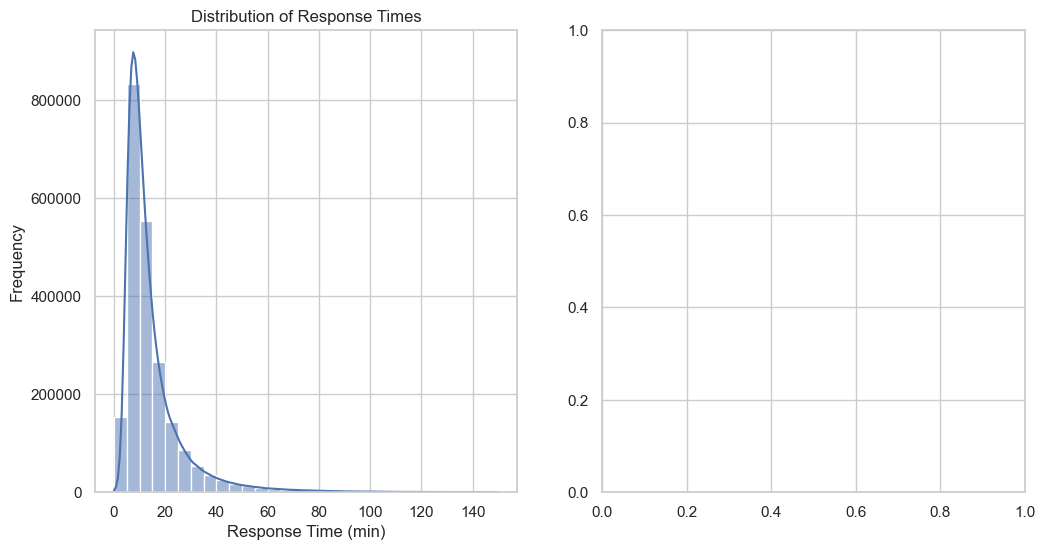

In [184]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(ambulance_raw['Resp_Time'], bins=30, kde=True)
plt.title('Distribution of Response Times')
plt.xlabel('Response Time (min)')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(ambulance_raw['To_Hosp'], bins=30, kde=True, color='orange')
plt.title('Distribution of Times to Hospital')
plt.xlabel('Time to Hospital (min)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

TypeError: the dtypes of parameters y (object) and height (float64) are incompatible

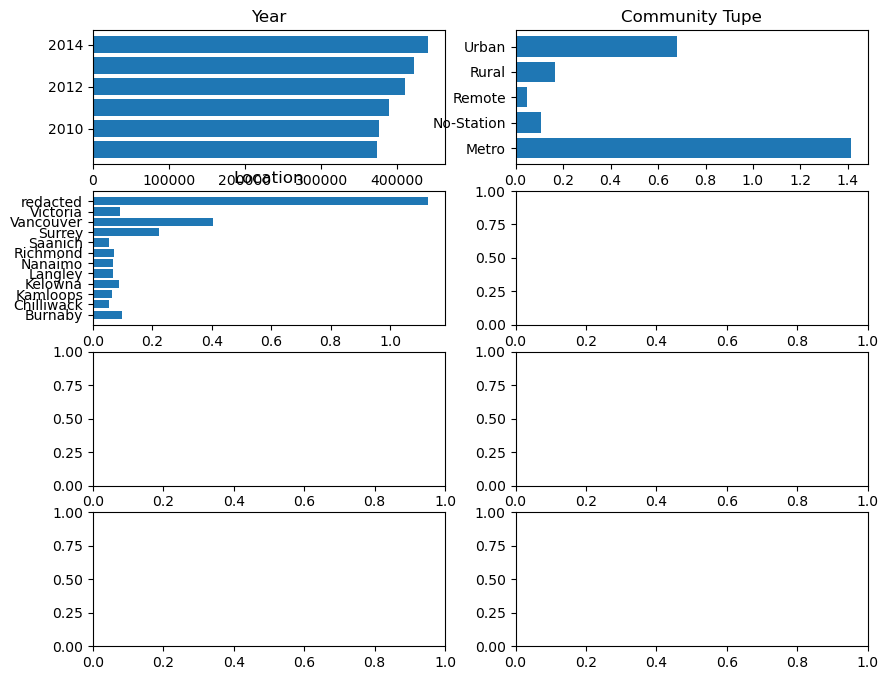

In [177]:
Responsemodeinit_counts = ambulance_raw.groupby('Response_Mode_Initial').size()
Responsemodefin_counts = ambulance_raw.groupby('Response_Mode_Final').size()
community_counts = ambulance_raw.groupby('Community_Type').size()
location_counts = ambulance_raw.groupby('Call_Loc_Community').size()
year_counts = ambulance_raw.groupby('Call_Year').size()
detcodeinit_counts = ambulance_raw.groupby('Det_Code_Init').size()
detcodefin_counts = ambulance_raw.groupby('Det_Code_Final').size()
cancelledevent_count = ambulance_raw.groupby('Event_Cancelled').size()
fig, ax = plt.subplots(4, 2, figsize=(10, 8))
ax[0, 0].barh(year_counts.index, year_counts)
ax[0, 0].set_title('Year')
ax[0, 1].barh(community_counts.index, community_counts)
ax[0, 1].set_title('Community Tupe')
ax[1, 0].barh(location_counts.index, location_counts)
ax[1, 0].set_title('Location')
ax[1, 1].barh(Responsemodeinit_counts.index, Responsemodeinit_counts)
ax[1, 1].set_title('Response Mode Initial')
ax[2, 0].barh(Responsemodefin_counts.index, Responsemodefin_counts)
ax[2, 0].set_title('Response Mode Final')
ax[2, 1].barh(detcodeinit_counts.index, detcodeinit_counts)
ax[2, 1].set_title('Determination Code initial')
ax[3, 0].barh(detcodefin_counts.index, detcodefin_counts)
ax[3, 0].set_title('Determination Code Final')
ax[3, 1].barh(cancelledevent_count.index, cancelledevent_count)
ax[3, 1].set_title('Events Cancelled')

fig.suptitle('Distribution of Emergency Event Characteristics')
fig.tight_layout(pad=50.0)
plt.show()

In [9]:
ambulance_raw.isnull().sum()

Call_Year                     0
Community_Type                0
Call_Loc_Community            0
Response_Mode_Initial         0
MPDS_Code_Initial             0
Det_Code_Init                 0
Response_Mode_Final           0
MPDS_Code_Final               0
Det_Code_Final                0
Event_Cancelled               0
Resp_Time                186875
To_Hosp                  598028
dtype: int64

In [11]:
ambulance_raw['Call_Loc_Community'].value_counts()[:5].index.tolist()

['redacted', 'Vancouver', 'Surrey', 'Burnaby', 'Victoria']

In [13]:
ambulance_raw['Call_Loc_Community'].value_counts()

redacted      1128641
Vancouver      403517
Surrey         220949
Burnaby         99400
Victoria        90799
Kelowna         88251
Richmond        72109
Nanaimo         68288
Langley         66363
Kamloops        63950
Saanich         54641
Chilliwack      54185
Name: Call_Loc_Community, dtype: int64

In [14]:
ambulance_raw['MPDS_Code_Initial'].value_counts()

redacted    231874
06D02        69954
26A10        61997
33A01T       60400
17A01G       50094
             ...  
28C04F           1
28C01Z           1
28C02J           1
28C09X           1
28C01E           1
Name: MPDS_Code_Initial, Length: 536, dtype: int64

In [5]:
ambulance_raw['Response_Mode_Initial'].unique()

array([2, 3, 1, '1', '2', '3', '.', '0'], dtype=object)

In [6]:
ambulance_raw['Response_Mode_Final'].unique()

array([2, 3, 1, '1', '3', '2', '0', '.'], dtype=object)

In [31]:
ambulance_raw['Community_Type'].value_counts()

Metro         1413176
Urban          678244
Rural          168032
No-Station     105258
Remote          46383
Name: Community_Type, dtype: int64

In [49]:
ambulance_raw['Community_Type'].unique()

array(['Remote', 'Rural', 'Metro', 'Urban', 'No-Station'], dtype=object)

In [32]:
ambulance_raw['Response_Mode_Initial'].value_counts()

3    938745
2    459271
1    371456
3    250608
.    212029
1    110693
2     64406
0      3885
Name: Response_Mode_Initial, dtype: int64

In [36]:
ambulance_raw['Response_Mode_Initial'].value_counts()

3    1189325
2     523654
1     482129
Name: Response_Mode_Initial, dtype: int64

In [33]:
ambulance_raw['Response_Mode_Final'].value_counts()

3    1262890
2     533948
1     496922
3      70128
1      27269
2      16569
0       3339
.         28
Name: Response_Mode_Final, dtype: int64

In [248]:
ambulance_raw['Response_Mode_Initial'] = ambulance_raw['Response_Mode_Initial'].astype(str)
ambulance_raw = ambulance_raw[~ambulance_raw['Response_Mode_Initial'].isin(['.', '0'])]
print(ambulance_raw['Response_Mode_Initial'].unique())

['2' '3' '1']


In [249]:
ambulance_raw['Response_Mode_Final'] = ambulance_raw['Response_Mode_Final'].astype(str)
ambulance_raw = ambulance_raw[~ambulance_raw['Response_Mode_Final'].isin(['.', '0'])]
print(ambulance_raw['Response_Mode_Final'].unique())

C:\Users\rzhon\AppData\Local\Temp\ipykernel_15520\4272915666.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['2' '3' '1']


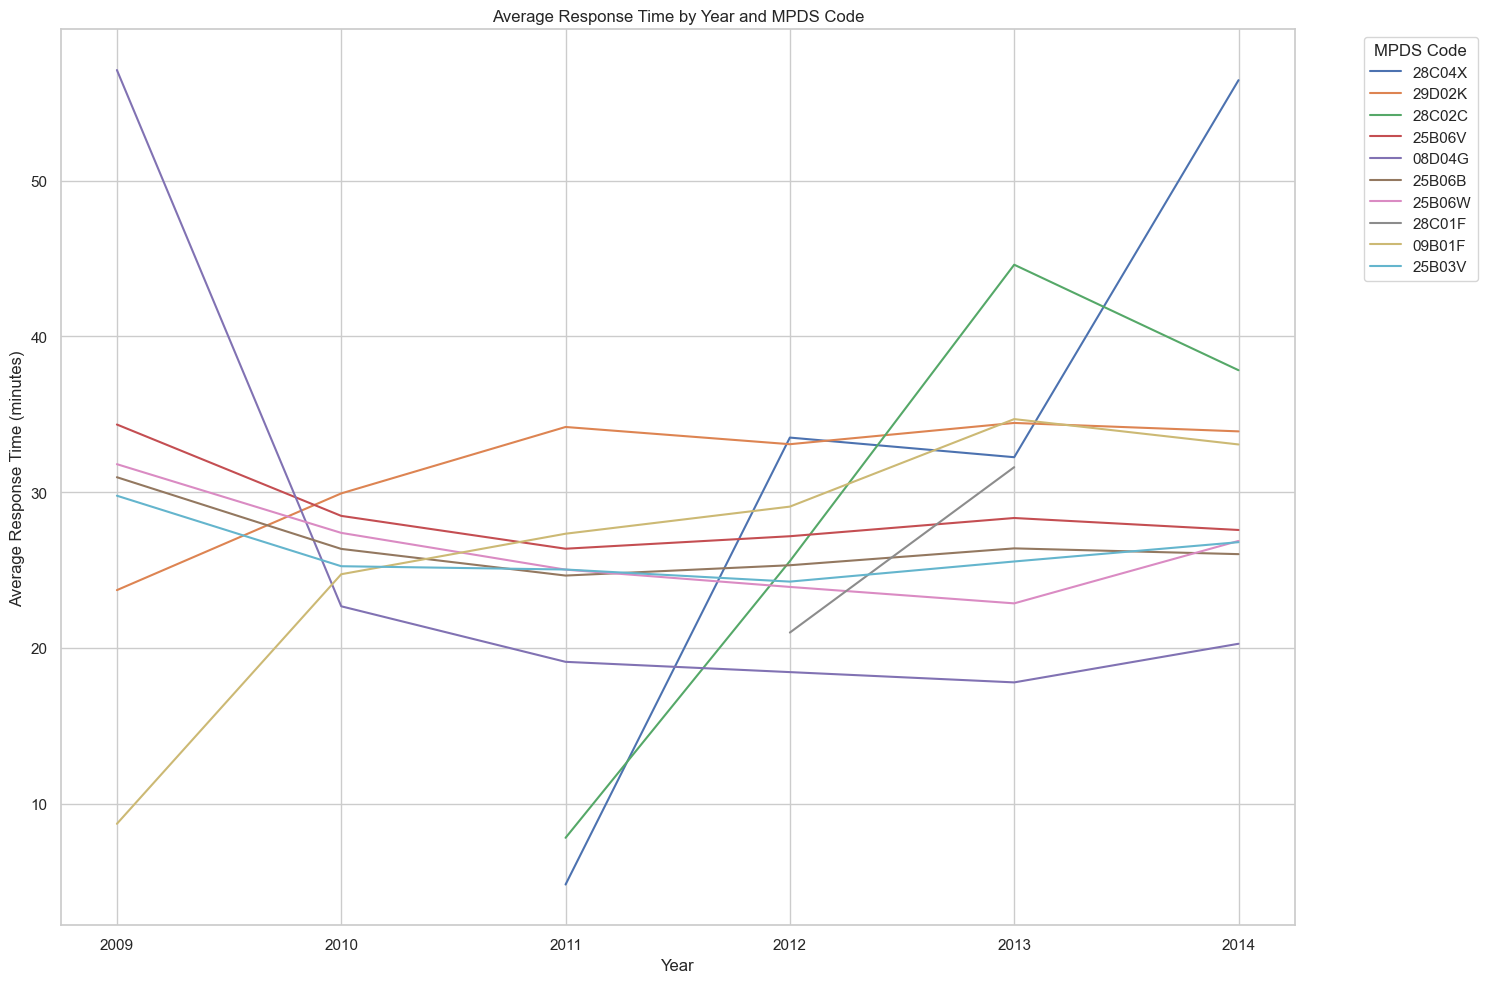

In [202]:
filtered_ambulance_raw = ambulance_raw[['Call_Year', 'MPDS_Code_Initial', 'Resp_Time']].dropna()
filtered_ambulance_raw['Resp_Time'] = pd.to_numeric(filtered_ambulance_raw['Resp_Time'], errors='coerce')
avgresptimecode = filtered_ambulance_raw.groupby(['Call_Year', 'MPDS_Code_Initial']).Resp_Time.mean().reset_index()
top12 = avgresptimecode.groupby('MPDS_Code_Initial').Resp_Time.mean().nlargest(12).index

fig, ax = plt.subplots(figsize=(15, 10))
for code in top12:
    code_ambulance_raw = avgresptimecode[avgresptimecode['MPDS_Code_Initial'] == code]
    if code_ambulance_raw.shape[0] > 1:
        ax.plot(code_ambulance_raw['Call_Year'], code_ambulance_raw['Resp_Time'], label=code)
        
ax.set_xlabel('Year')
ax.set_ylabel('Average Response Time (minutes)')
ax.set_title('Average Response Time by Year and MPDS Code')
ax.legend(title='MPDS Code', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

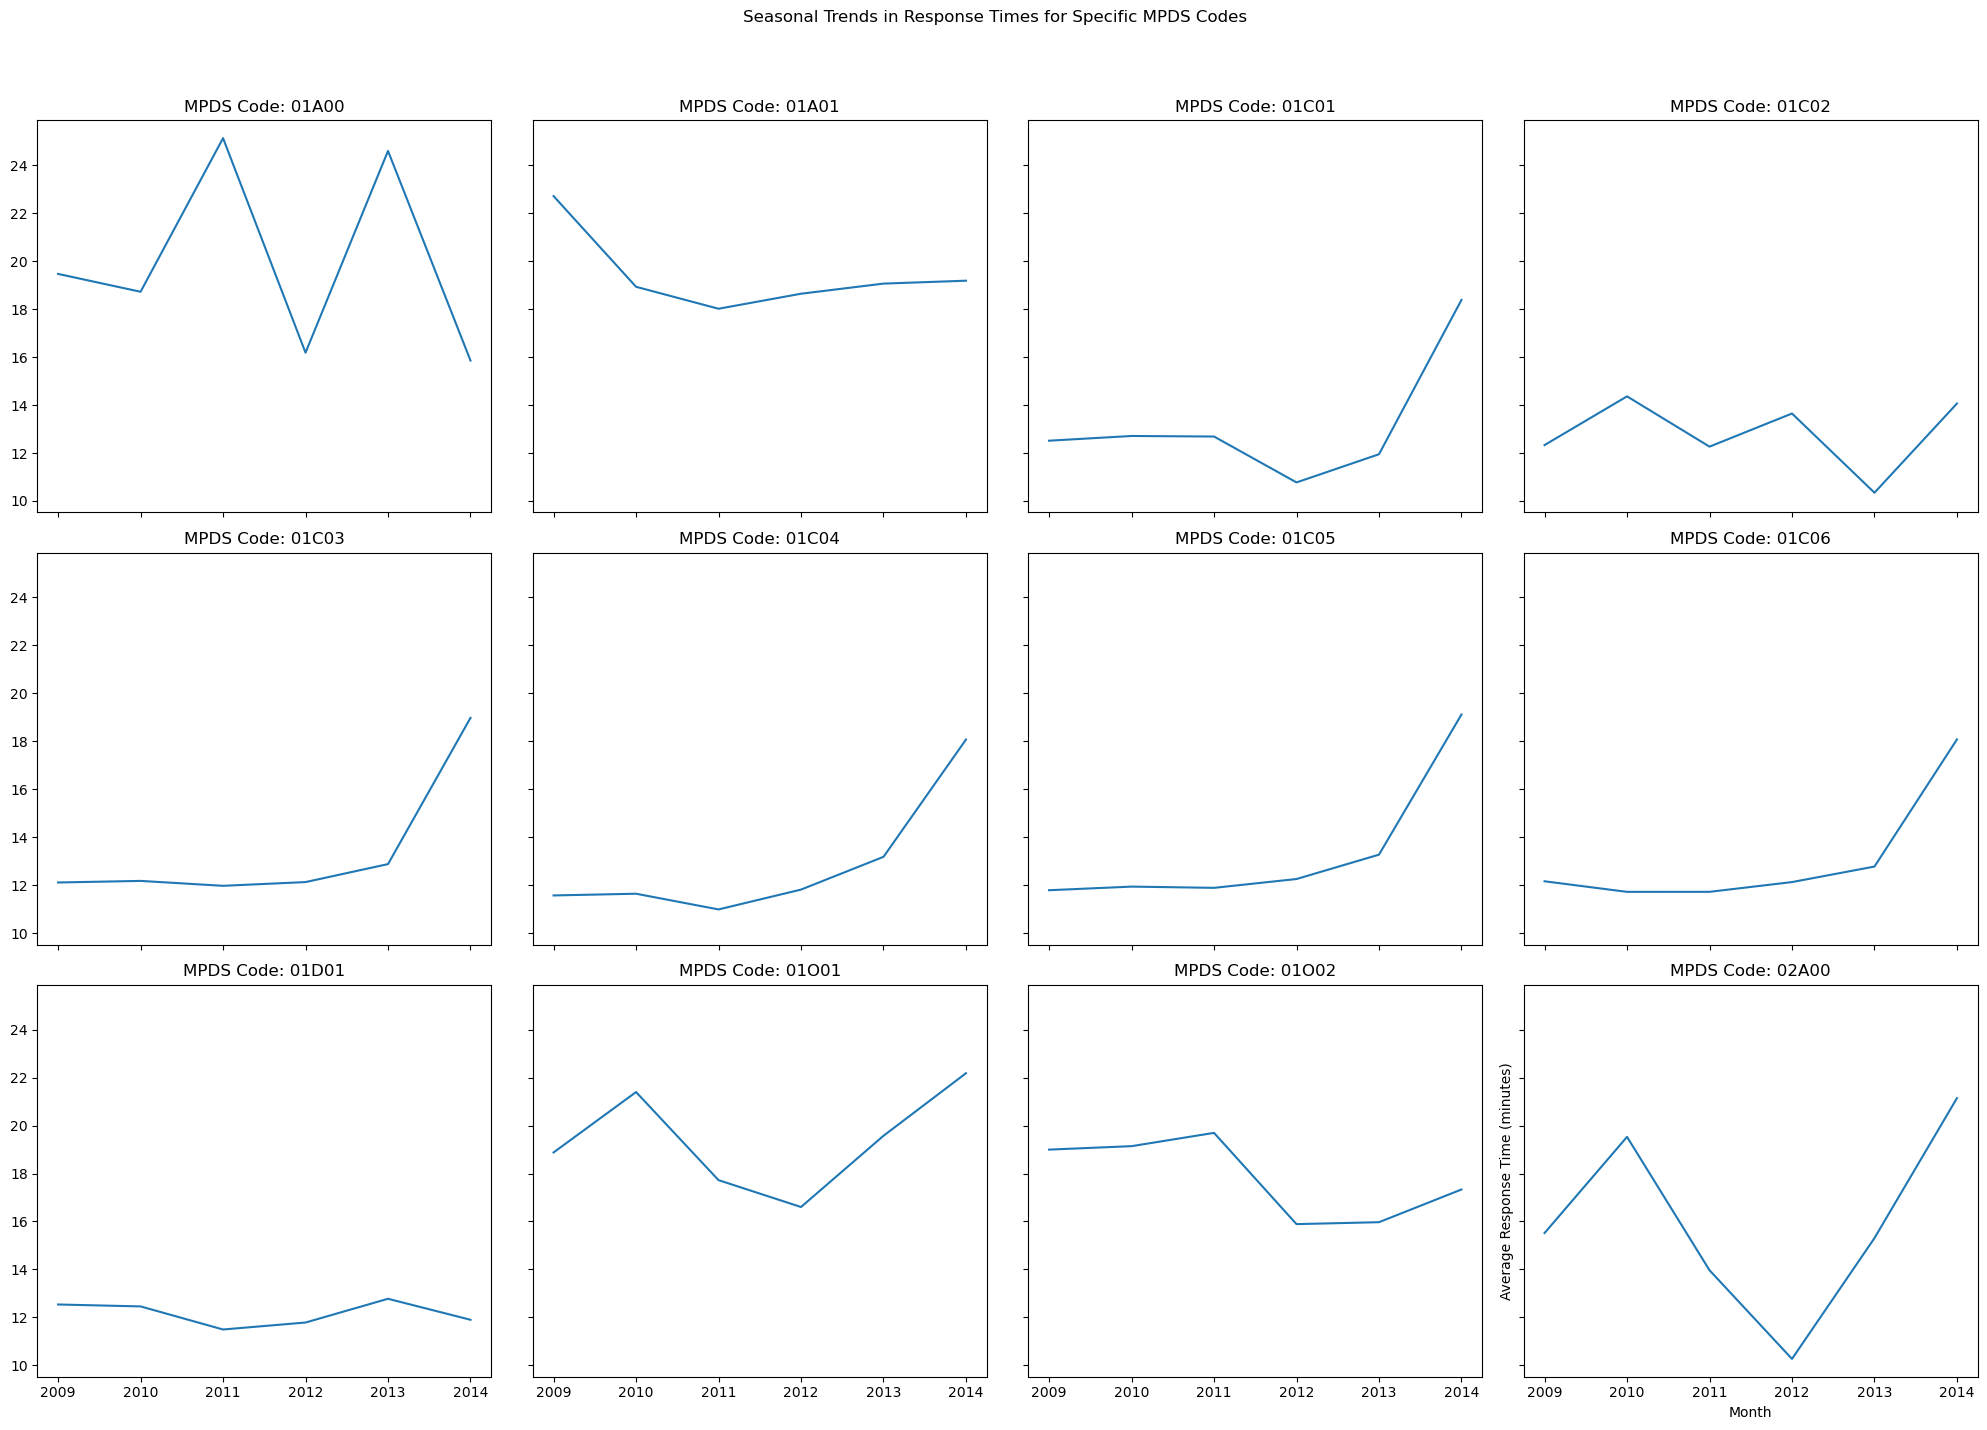

In [16]:
avgresptimecode = ambulance_raw.groupby(['MPDS_Code_Initial', 'Call_Year']).Resp_Time.mean().reset_index()
fig, axs = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)
axs = axs.flatten()

for i, code in enumerate(avgresptimecode['MPDS_Code_Initial'].unique()[:12]):
    code_ambulance_raw = avgresptimecode[avgresptimecode['MPDS_Code_Initial'] == code]
    axs[i].plot(code_ambulance_raw['Call_Year'], code_ambulance_raw['Resp_Time'])
    axs[i].set_title('MPDS Code: ' + code)

plt.suptitle('Seasonal Trends in Response Times for Specific MPDS Codes')
plt.xlabel('Month')
plt.ylabel('Average Response Time (minutes)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [23]:
responsechangepercentage = (ambulance_raw['Response_Mode_Initial'] != ambulance_raw['Response_Mode_Final']).mean() * 100
mpdschangepercentage = (ambulance_raw['MPDS_Code_Initial'] != ambulance_raw['MPDS_Code_Final']).mean() * 100
determinantchangepercentage = (ambulance_raw['Det_Code_Init'] != ambulance_raw['Det_Code_Final']).mean() * 100
responsechangepercentage, mpdschangepercentage, determinantchangepercentage

(3.112147557204475, 7.929541507752694, 4.122075086966108)

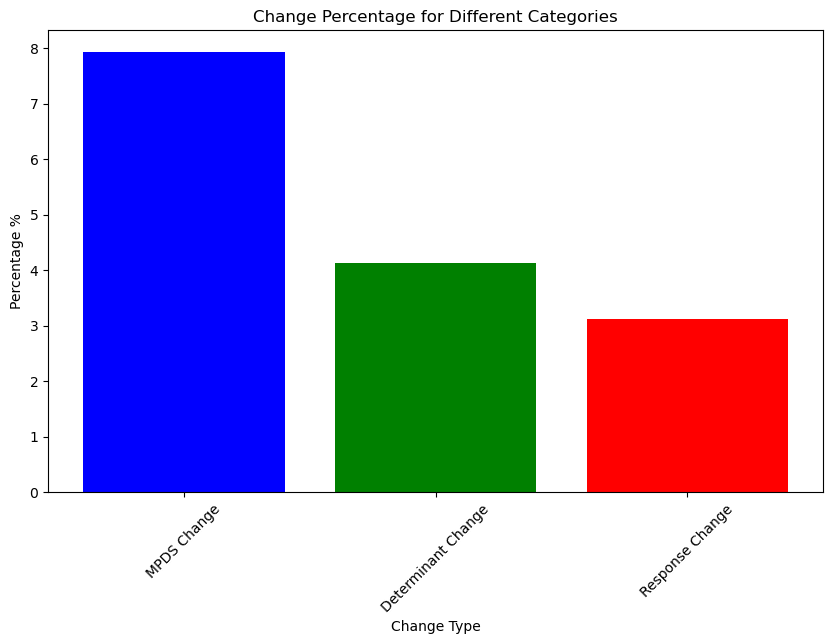

In [38]:
d = {'Response Change': responsechangepercentage, 'MPDS Change': mpdschangepercentage, 'Determinant Change': determinantchangepercentage}
sortedd = sorted(d.items(), key=lambda x: x[1], reverse=True)
labels, values = zip(*sortedd)

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.xlabel('Change Type')
plt.ylabel('Percentage %')
plt.title('Change Percentage for Different Categories')
plt.xticks(rotation=45)
plt.show()

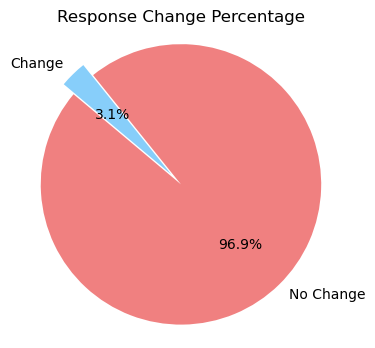

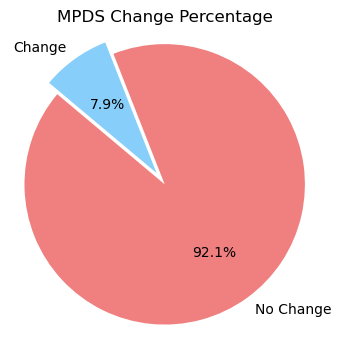

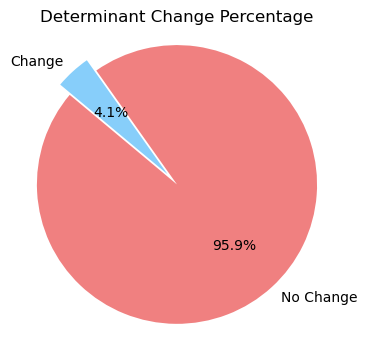

In [39]:
labels = ['No Change', 'Change']
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.1)
plt.figure(figsize=(4, 4))
plt.pie([100 - responsechangepercentage, responsechangepercentage], labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Response Change Percentage')
plt.show()
plt.figure(figsize=(4, 4))
plt.pie([100 - mpdschangepercentage, mpdschangepercentage], labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('MPDS Change Percentage')
plt.show()
plt.figure(figsize=(4, 4))
plt.pie([100 - determinantchangepercentage, determinantchangepercentage], labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Determinant Change Percentage')
plt.show()

In [216]:
 ambulance_raw[(ambulance_raw['Resp_Time'].notnull()) & (ambulance_raw['To_Hosp'].isnull())].shape[0]

445910

In [217]:
ambulance_raw[(ambulance_raw['To_Hosp'].notnull()) & (ambulance_raw['Resp_Time'].isnull())].shape[0]

34757

In [221]:
ambulance_raw[(ambulance_raw['To_Hosp'].isnull()) & (ambulance_raw['Resp_Time'].isnull())].shape[0]

152118

In [218]:
ambulance_raw['code_change'] = ambulance_raw.apply(lambda x: 'No Change' if x['MPDS_Code_Initial'] == x['MPDS_Code_Final'] else 'Changed', axis=1)
avg_response_by_change = ambulance_raw.groupby('code_change')['To_Hosp'].mean().reset_index()
avg_response_by_change.columns = ['code_change', 'avg_response_time']

In [220]:
avg_response_by_change.columns

Index(['code_change', 'avg_response_time'], dtype='object')

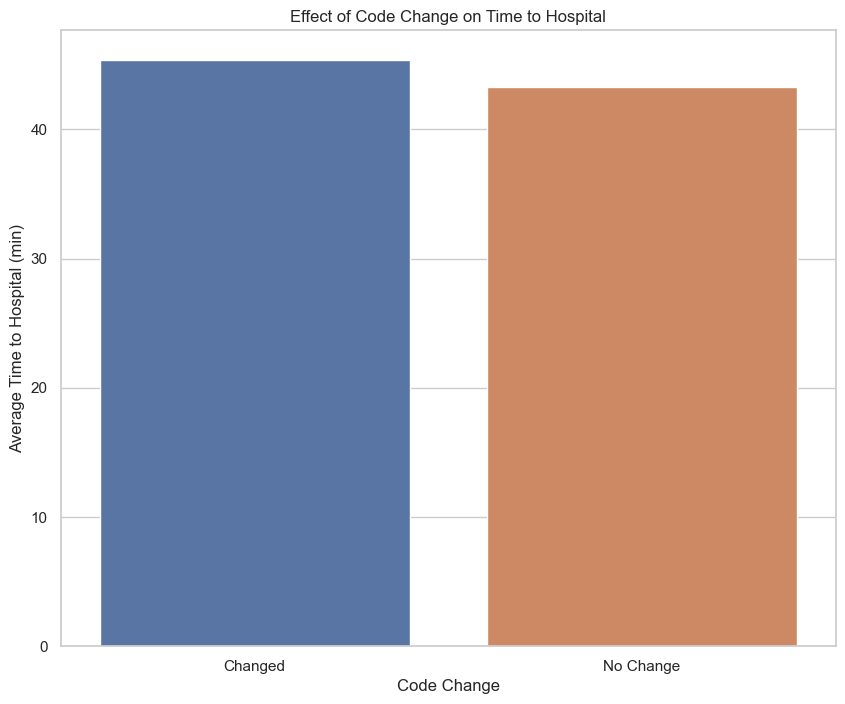

In [219]:
plt.figure(figsize=(10, 8))
sns.barplot(data=avg_response_by_change, x='code_change', y='avg_response_time')
plt.title('Effect of Code Change on Time to Hospital')
plt.xlabel('Code Change')
plt.ylabel('Average Time to Hospital (min)')
#sns.despine()
plt.show()

In [54]:
responsemodecounts = (ambulance_raw['Response_Mode_Initial'] != ambulance_raw['Response_Mode_Final']).value_counts()
mpdscounts = (ambulance_raw['MPDS_Code_Initial'] != ambulance_raw['MPDS_Code_Final']).value_counts()
detcounts = (ambulance_raw['Det_Code_Init'] != ambulance_raw['Det_Code_Final']).value_counts()
responsemodecounts,mpdscounts,detcounts

(False    2126793
 True       68315
 dtype: int64,
 False    2021046
 True      174062
 dtype: int64,
 False    2104624
 True       90484
 dtype: int64)

In [53]:
ambulance_raw = {'Response Mode Change': responsemodecounts, 'MPDS Change': mpdscounts, 'Determinant Change': detcounts}
sorted_ambulance_raw = sorted(ambulance_raw.items(), key=lambda x: x[1], reverse=True)
labels, values = zip(*sorted_ambulance_raw)
plt.bar(labels, values)
plt.xlabel('Change Type')
plt.ylabel('Count')
plt.title('Change Count for Different Categories')
plt.xticks(rotation=45)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [76]:
ambulance_raw1 = ambulance_raw
ambulance_raw1['Call_Year'] = ambulance_raw['Call_Year'].astype('object')

In [79]:
categorical_columns = ambulance_raw.select_dtypes(include=['object']).columns
catagorical_uniques = ambulance_raw[categorical_columns].nunique()
low_cardinality_columns = catagorical_uniques[catagorical_uniques <= 14].index
ambulance_raw1 = pd.get_dummies(ambulance_raw, columns=low_cardinality_columns, drop_first=True)
ambulance_raw1

C:\Users\rzhon\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


MPDS_Code_Initial MPDS_Code_Final  Resp_Time  To_Hosp  Call_Year_2010  \
0                  17A01G          17A01G       12.2     74.4               0   
1                  29D02P          29D02P        NaN      NaN               0   
2                   03O01        redacted       31.3      NaN               0   
3                   06D02           06D02       14.9     49.7               0   
4                   17O01           17O01       17.6     63.6               0   
...                   ...             ...        ...      ...             ...   
2411061             25A00        redacted      120.8    190.7               0   
2411062             25B06           25B06       32.9     49.5               0   
2411063             04B02           04D03      112.0    214.4               0   
2411082             23C01           23B01       21.8     54.2               0   
2411092             29B06           29B06        NaN      NaN               0   

         Call_Year_2011  Call_Year_2012  Call_Year_2013  Call_Year_2014  \
0                     0               0               0               1   
1                     0               0               0               1   
2                     0               0               0               1   
3                     0               0               0               1   
4                     0               0               0               1   
...                 ...             ...             ...             ...   
2411061               0               0               0               0   
2411062               0               0               0               0   
2411063               0               0               0               0   
2411082               0               0               0               0   
2411092               0               0               0               0   

         Community_Type_No-Station  ...  Det_Code_Init_E  Det_Code_Init_O  \
0                                0  ...                0                0   
1                                0  ...                0                0   
2                                0  ...                0                1   
3                                0  ...                0                0   
4                                0  ...                0                1   
...                            ...  ...              ...              ...   
2411061                          1  ...                0                0   
2411062                          1  ...                0                0   
2411063                          1  ...                0                0   
2411082                          1  ...                0                0   
2411092                          1  ...                0                0   

         Response_Mode_Final_2  Response_Mode_Final_3  Det_Code_Final_B  \
0                            1                      0                 0   
1                            0                      1                 0   
2                            1                      0                 0   
3                            0                      1                 0   
4                            1                      0                 0   
...                        ...                    ...               ...   
2411061                      0                      0                 0   
2411062                      1                      0                 1   
2411063                      0                      1                 0   
2411082                      1                      0                 1   
2411092                      0                      1                 1   

         Det_Code_Final_C  Det_Code_Final_D  Det_Code_Final_E  \
0                       0                 0                 0   
1                       0                 1                 0   
2                       0                 0                 0   
3                       0                 1     

In [80]:
corrmatrix = ambulance_raw1.corr()
corrmatrix

Resp_Time   To_Hosp  Call_Year_2010  \
Resp_Time                       1.000000  0.662699       -0.008567   
To_Hosp                         0.662699  1.000000        0.000878   
Call_Year_2010                 -0.008567  0.000878        1.000000   
Call_Year_2011                 -0.026235 -0.000364       -0.193423   
Call_Year_2012                 -0.016543 -0.001083       -0.199821   
Call_Year_2013                  0.000735 -0.001823       -0.203189   
Call_Year_2014                  0.024590  0.009237       -0.208970   
Community_Type_No-Station       0.192158  0.238506       -0.001032   
Community_Type_Remote           0.096823  0.155876       -0.001183   
Community_Type_Rural           -0.048788  0.044859        0.000542   
Community_Type_Urban           -0.124499 -0.121188       -0.011084   
Call_Loc_Community_Chilliwack  -0.007849 -0.022382        0.003496   
Call_Loc_Community_Kamloops    -0.020420 -0.029934        0.003065   
Call_Loc_Community_Kelowna     -0.041377 -0.033074        0.002301   
Call_Loc_Community_Langley      0.036567  0.018419        0.003469   
Call_Loc_Community_Nanaimo     -0.050002 -0.042446       -0.017892   
Call_Loc_Community_Richmond     0.025827  0.005030        0.005061   
Call_Loc_Community_Saanich     -0.038745 -0.015273       -0.015158   
Call_Loc_Community_Surrey       0.046128  0.001780        0.001384   
Call_Loc_Community_Vancouver   -0.031159 -0.055313        0.014109   
Call_Loc_Community_Victoria    -0.061192 -0.041567       -0.019414   
Call_Loc_Community_redacted     0.027828  0.082367       -0.004403   
Response_Mode_Initial_2         0.139308  0.055655       -0.080218   
Response_Mode_Initial_3        -0.294304 -0.123442        0.038810   
Det_Code_Init_B                 0.024247  0.004542        0.006209   
Det_Code_Init_C                -0.115155 -0.064453       -0.006947   
Det_Code_Init_D                -0.166057 -0.063860        0.007375   
Det_Code_Init_E                -0.032630  0.005494        0.002155   
Det_Code_Init_O                 0.078479  0.023764        0.010502   
Response_Mode_Final_2           0.133357  0.052041       -0.081120   
Response_Mode_Final_3          -0.275675 -0.113947        0.040129   
Det_Code_Final_B                0.023016  0.002349        0.006793   
Det_Code_Final_C               -0.100452 -0.057880       -0.006354   
Det_Code_Final_D               -0.156763 -0.057720        0.007056   
Det_Code_Final_E               -0.033743  0.006458        0.002886   
Det_Code_Final_O                0.071354  0.020519        0.009596   
Event_Cancelled_Y                    NaN -0.012900       -0.006900   

                               Call_Year_2011  Call_Year_2012  Call_Year_2013  \
Resp_Time                           -0.026235       -0.016543        0.000735   
To_Hosp                             -0.000364       -0.001083       -0.001823   
Call_Year_2010                      -0.193423       -0.199821       -0.203189   
Call_Year_2011                       1.000000       -0.222519       -0.226270   
Call_Year_2012                      -0.222519        1.000000       -0.233754   
Call_Year_2013                      -0.226270       -0.233754        1.000000   
Call_Year_2014                      -0.232707       -0.240404       -0.244456   
Community_Type_No-Station            0.005506        0.008217        0.013215   
Community_Type_Remote                0.008060        0.006840        0.005377   
Community_Type_Rural                 0.015140        0.014867        0.012153   
Community_Type_Urban                 0.022287        0.026132        0.023439   
Call_Loc_Community_Chilliwack       -0.005478       -0.006699       -0.006931   
Call_Loc_Community_Kamloops          0.006247        0.006307        0.009956   
Call_Loc_Community_Kelowna           0.007712        0.010598        0.010321   
Call_Loc_Community_Langley          -0.006350       -0.005228       -0.007811   
Call_Loc_Community_Nanaimo           0.011117        0.015677        0.014

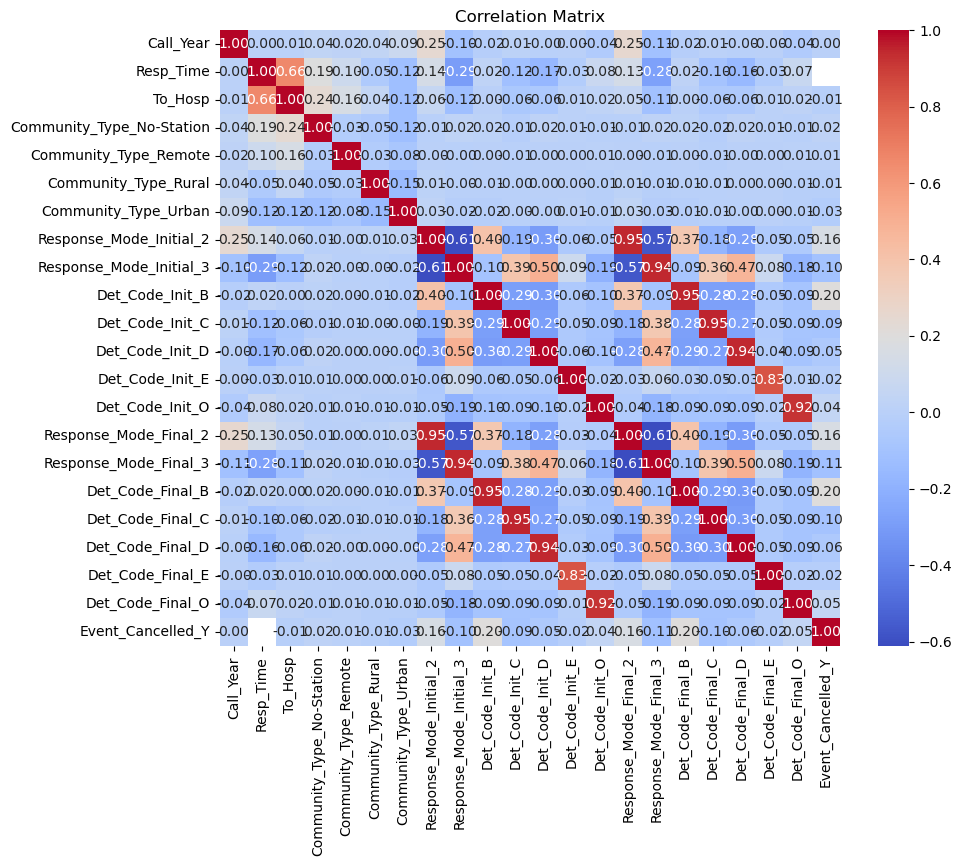

In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(corrmatrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [94]:
outliers = ambulance_raw[ambulance_raw.select_dtypes(include=['float64', 'int64']).columns].apply(lambda x: x[(x < (x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))) | (x > (x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))))])
outliers.describe()

Resp_Time       To_Hosp
count  157138.000000  79740.000000
mean       48.544437    113.587013
std        19.342794     83.120248
min        31.000000    -35.500000
25%        35.300000     88.900000
50%        41.800000     99.300000
75%        54.700000    119.300000
max       150.000000  15741.000000

In [96]:
outliers

Resp_Time  To_Hosp
2             31.3      NaN
5             73.0    118.4
6             40.6    120.3
7             71.3      NaN
8             33.0      NaN
...            ...      ...
2410997       52.2      NaN
2411031       84.4    117.1
2411061      120.8    190.7
2411062       32.9      NaN
2411063      112.0    214.4

[187031 rows x 2 columns]

In [268]:
ambulance_raw2 = ambulance_raw

In [256]:
for column in ['Resp_Time', 'To_Hosp']:
    percentiles = ambulance_raw2[column].quantile([0.01,0.99]).values
    ambulance_raw2[column] = np.clip(ambulance_raw2[column], percentiles[0], percentiles[1])

C:\Users\rzhon\AppData\Local\Temp\ipykernel_15520\3161041247.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [241]:
ambulance_raw2

Call_Year Community_Type Call_Loc_Community Response_Mode_Initial  \
0             2014         Remote           redacted                     2   
3             2014         Remote           redacted                     3   
4             2014         Remote           redacted                     2   
5             2014         Remote           redacted                     2   
6             2014         Remote           redacted                     2   
...            ...            ...                ...                   ...   
2411085       2009     No-Station           redacted                     .   
2411086       2009     No-Station           redacted                     .   
2411087       2009     No-Station           redacted                     .   
2411089       2009     No-Station           redacted                     .   
2411090       2009     No-Station           redacted                     .   

        MPDS_Code_Initial Det_Code_Init Response_Mode_Final MPDS_Code_Final  \
0                  17A01G             A                   2          17A01G   
3                   06D02             D                   3           06D02   
4                   17O01             O                   2           17O01   
5                   17O01             O                   2           17O01   
6                   17A01             A                   2           17A01   
...                   ...           ...                 ...             ...   
2411085          redacted             .                   3           28C01   
2411086          redacted             .                   3           01D01   
2411087          redacted             .                   3           06D01   
2411089          redacted             .                   3           06D01   
2411090          redacted             .                   1           17A00   

        Det_Code_Final Event_Cancelled  Resp_Time  To_Hosp code_change  \
0                    A               N       12.2     74.4   No Change   
3                    D               N       14.9     49.7   No Change   
4                    O               N       17.6     63.6   No Change   
5                    O               N       73.0    118.4   No Change   
6                    A               N       40.6    120.3   No Change   
...                ...             ...        ...      ...         ...   
2411085              C               N       19.4     55.8     Changed   
2411086              D               N       20.6     83.3     Changed   
2411087              D               N       32.6     84.0     Changed   
2411089              D               N       14.4     53.4     Changed   
2411090              A               N       62.6    150.4     Changed   

         TimeDifference  
0                  62.2  
3                  34.8  
4                  46.0  
5                  45.4  
6                  79.7  
...                 ...  
2411085            36.4  
2411086            62.7  
2411087            51.4  
2411089            39.0  
2411090            87.8  

[1778308 rows x 14 columns]

In [269]:
ambulance_raw2 = ambulance_raw.drop(ambulance_raw[(ambulance_raw['To_Hosp'].isnull()) | (ambulance_raw['Resp_Time'].isnull())].index)
ambulance_raw2['TimeDifference'] = ambulance_raw2['To_Hosp'] - ambulance_raw2['Resp_Time']

In [270]:

for col in ambulance_raw2.select_dtypes(include='number').columns:
    print((ambulance_raw2[col] < 0).sum())
    if (ambulance_raw2[col] < 0).sum() > 0:
        ambulance_raw2 = ambulance_raw2[ambulance_raw2[col] >= 0]
        

0
0
13
1045


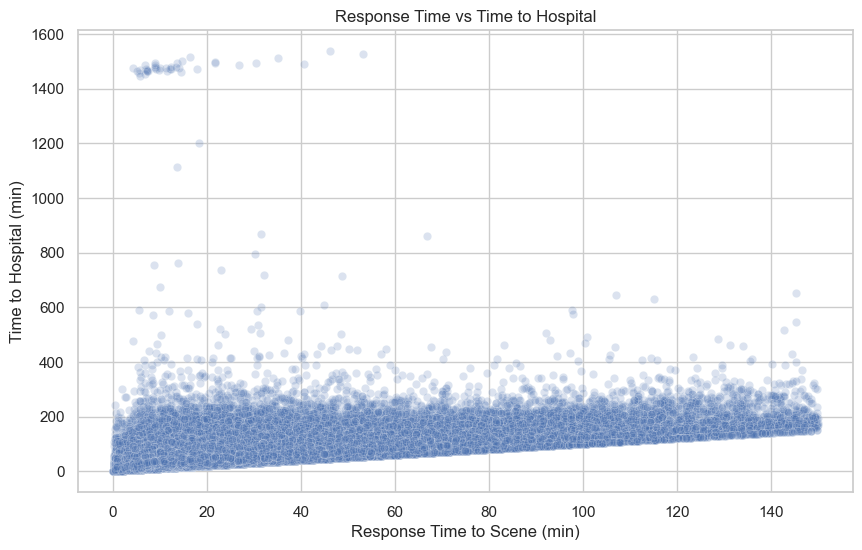

In [271]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Resp_Time', y='To_Hosp', data=ambulance_raw2, alpha=0.2)
"""
z = np.polyfit(ambulance_raw2['Resp_Time'], ambulance_raw2['To_Hosp'], 1)
p = np.poly1d(z)
plt.plot(ambulance_raw2['Resp_Time'], p(ambulance_raw2['Resp_Time']), "r--")
"""
plt.title('Response Time vs Time to Hospital')
plt.xlabel('Response Time to Scene (min)')
plt.ylabel('Time to Hospital (min)')
plt.show()

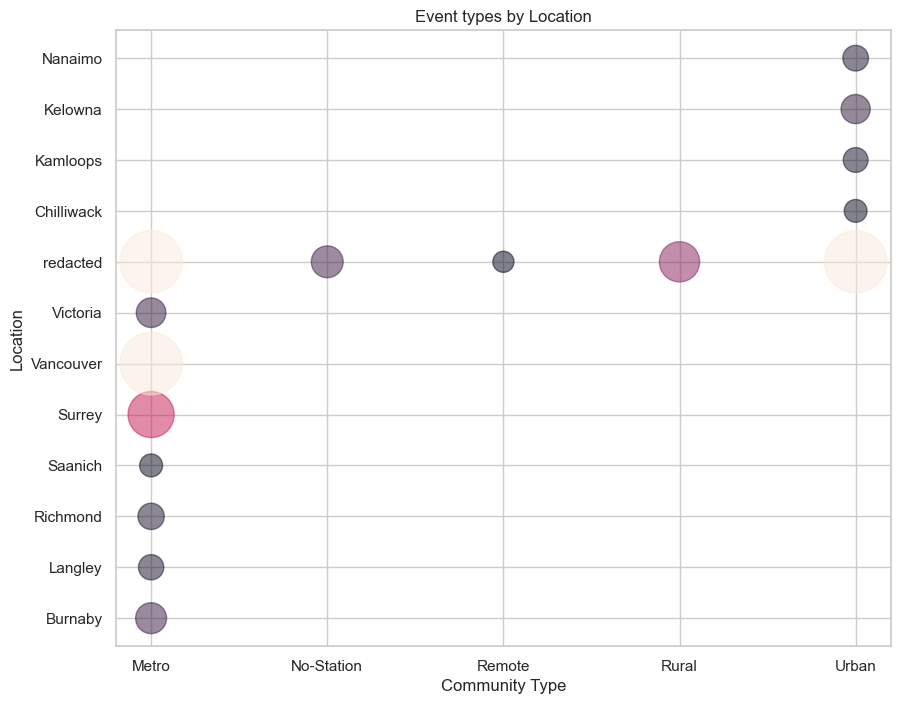

In [187]:
location_grp = ambulance_raw.groupby(['Community_Type','Call_Loc_Community'])
location_grp_count = location_grp['MPDS_Code_Initial'].count().reset_index()
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(location_grp_count['Community_Type'], location_grp_count['Call_Loc_Community'], s=location_grp_count['MPDS_Code_Initial']*.005, c=location_grp_count['MPDS_Code_Initial'], alpha=0.5)
ax.set_xlabel('Community Type')
ax.set_ylabel('Location')
ax.set_title('Event types by Location')
plt.show()

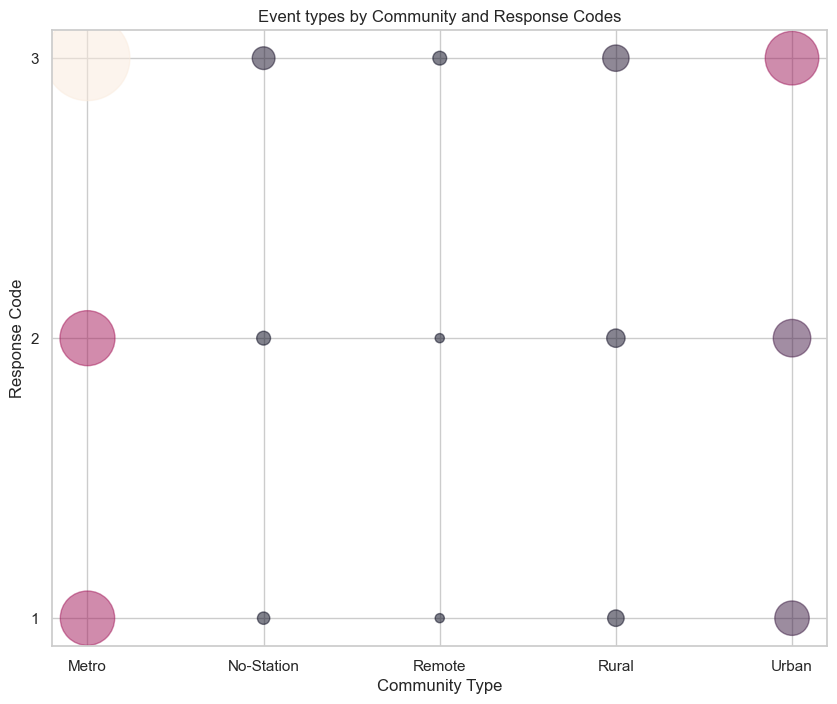

In [250]:
location_grp = ambulance_raw.groupby(['Community_Type','Response_Mode_Initial'])
location_grp_count = location_grp['MPDS_Code_Initial'].count().reset_index()
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(location_grp_count['Community_Type'], location_grp_count['Response_Mode_Initial'], s=location_grp_count['MPDS_Code_Initial']*.005, c=location_grp_count['MPDS_Code_Initial'], alpha=0.5)
ax.set_xlabel('Community Type')
ax.set_ylabel('Response Code')
ax.set_title('Event types by Community and Response Codes')
plt.show()

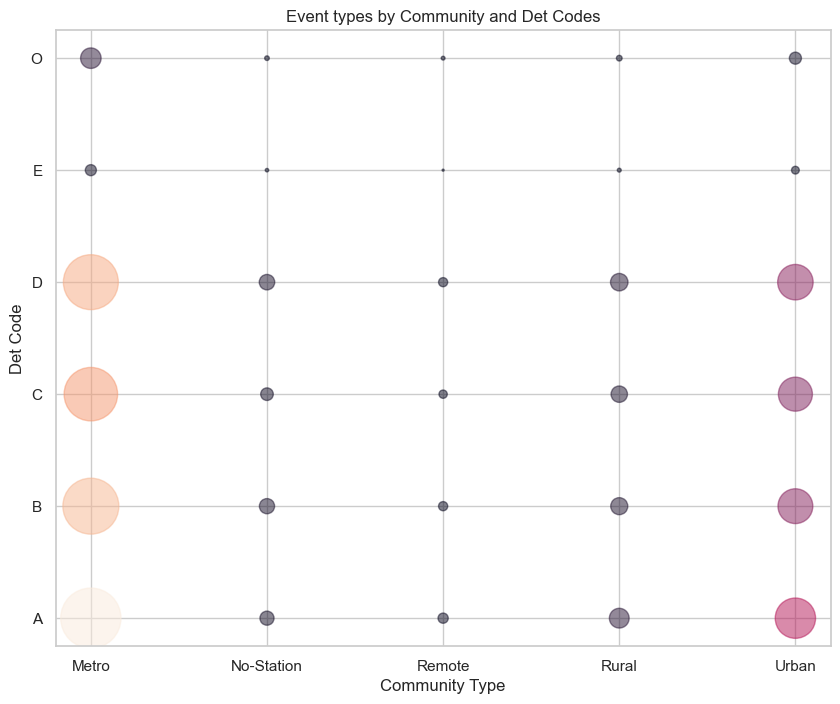

In [253]:
location_grp = ambulance_raw.groupby(['Community_Type','Det_Code_Init'])
location_grp_count = location_grp['MPDS_Code_Initial'].count().reset_index()
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(location_grp_count['Community_Type'], location_grp_count['Det_Code_Init'], s=location_grp_count['MPDS_Code_Initial']*.005, c=location_grp_count['MPDS_Code_Initial'], alpha=0.5)
ax.set_xlabel('Community Type')
ax.set_ylabel('Det Code')
ax.set_title('Event types by Community and Det Codes')
plt.show()

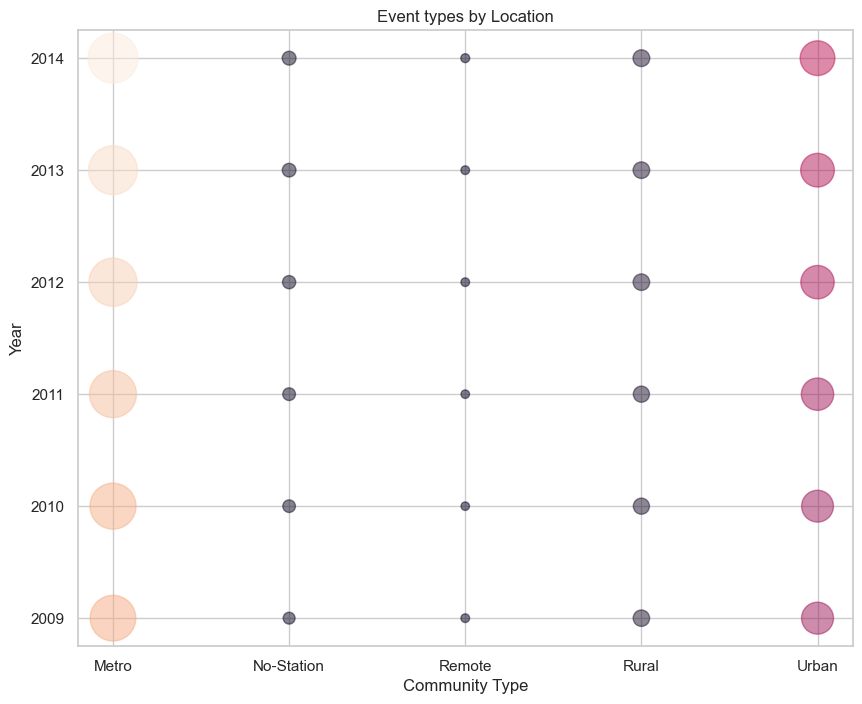

In [188]:
location_grp = ambulance_raw.groupby(['Community_Type','Call_Year'])
location_grp_count = location_grp['MPDS_Code_Initial'].count().reset_index()
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(location_grp_count['Community_Type'], location_grp_count['Call_Year'], s=location_grp_count['MPDS_Code_Initial']*.005, c=location_grp_count['MPDS_Code_Initial'], alpha=0.5)
ax.set_xlabel('Community Type')
ax.set_ylabel('Year')
ax.set_title('Event types by Location')
plt.show()

In [164]:
import plotly.express as px

In [168]:
grouped_ambulance_raw = ambulance_raw.groupby(['Community_Type', 'Call_Loc_Community']).size().reset_index(name='NumofCalls')
fig = px.scatter(grouped_ambulance_raw,
                 x='Community_Type',
                 y='Call_Loc_Community',
                 size='NumofCalls',
                 color='NumofCalls',
                 hover_name='NumofCalls',
                 title='Event types by Location',
                 labels={'Community_Type': 'Community_Type',
                         'Call_Loc_Community': 'Location',
                         'NumofCalls': 'Number of Calls'},
                 )
fig.update_xaxes(title='Community Type', tickangle=45, tickfont=dict(size=10))
fig.update_yaxes(title='Location', tickfont=dict(size=10))
fig.update_layout(width=800, height=600, margin=dict(l=50, r=50, b=100, t=100))
fig.show()

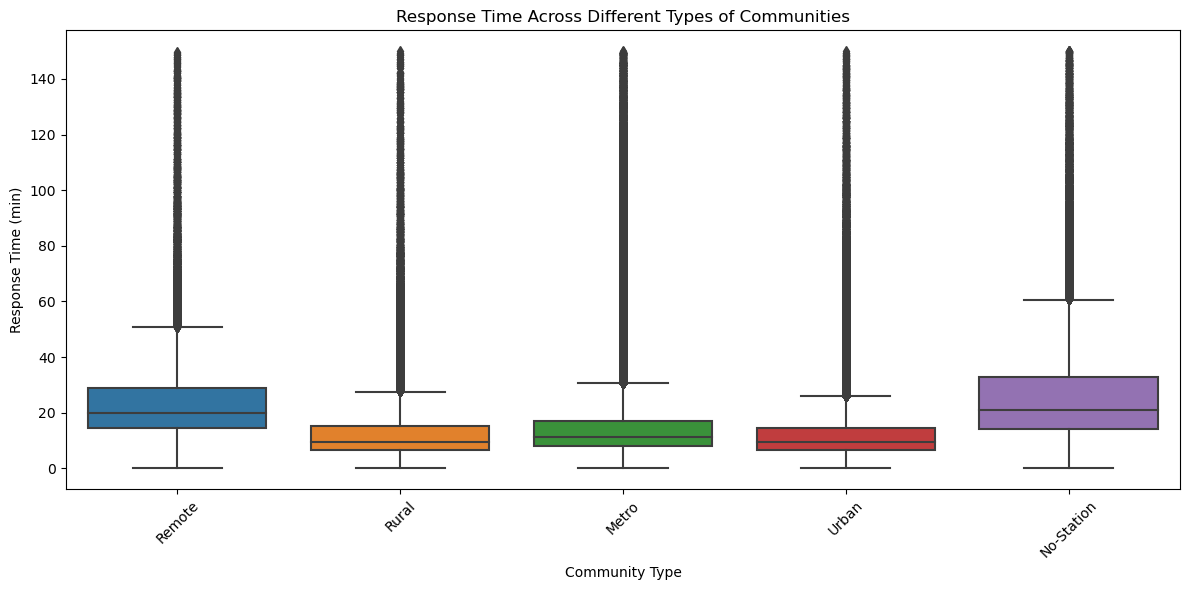

In [178]:
ambulance_raw = ambulance_raw[ambulance_raw['Resp_Time'] > 0]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Community_Type', y='Resp_Time', data=ambulance_raw)
plt.title('Response Time Across Different Types of Communities')
plt.ylabel('Response Time (min)')
plt.xlabel('Community Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

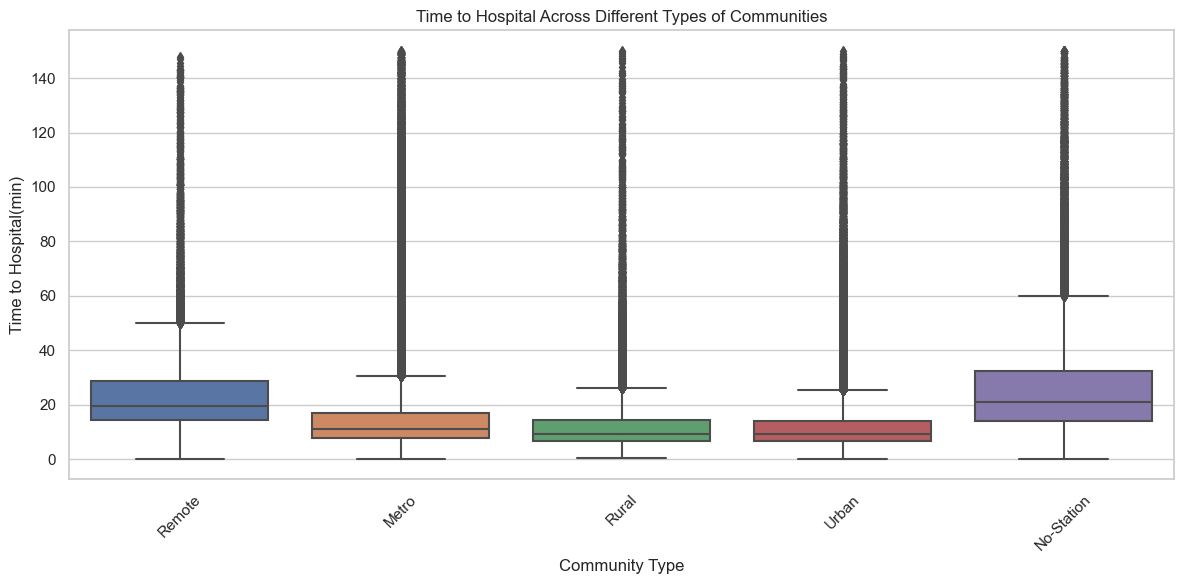

In [254]:
ambulance_raw = ambulance_raw[ambulance_raw['To_Hosp'] > 0]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Community_Type', y='Resp_Time', data=ambulance_raw)
plt.title('Time to Hospital Across Different Types of Communities')
plt.ylabel('Time to Hospital(min)')
plt.xlabel('Community Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

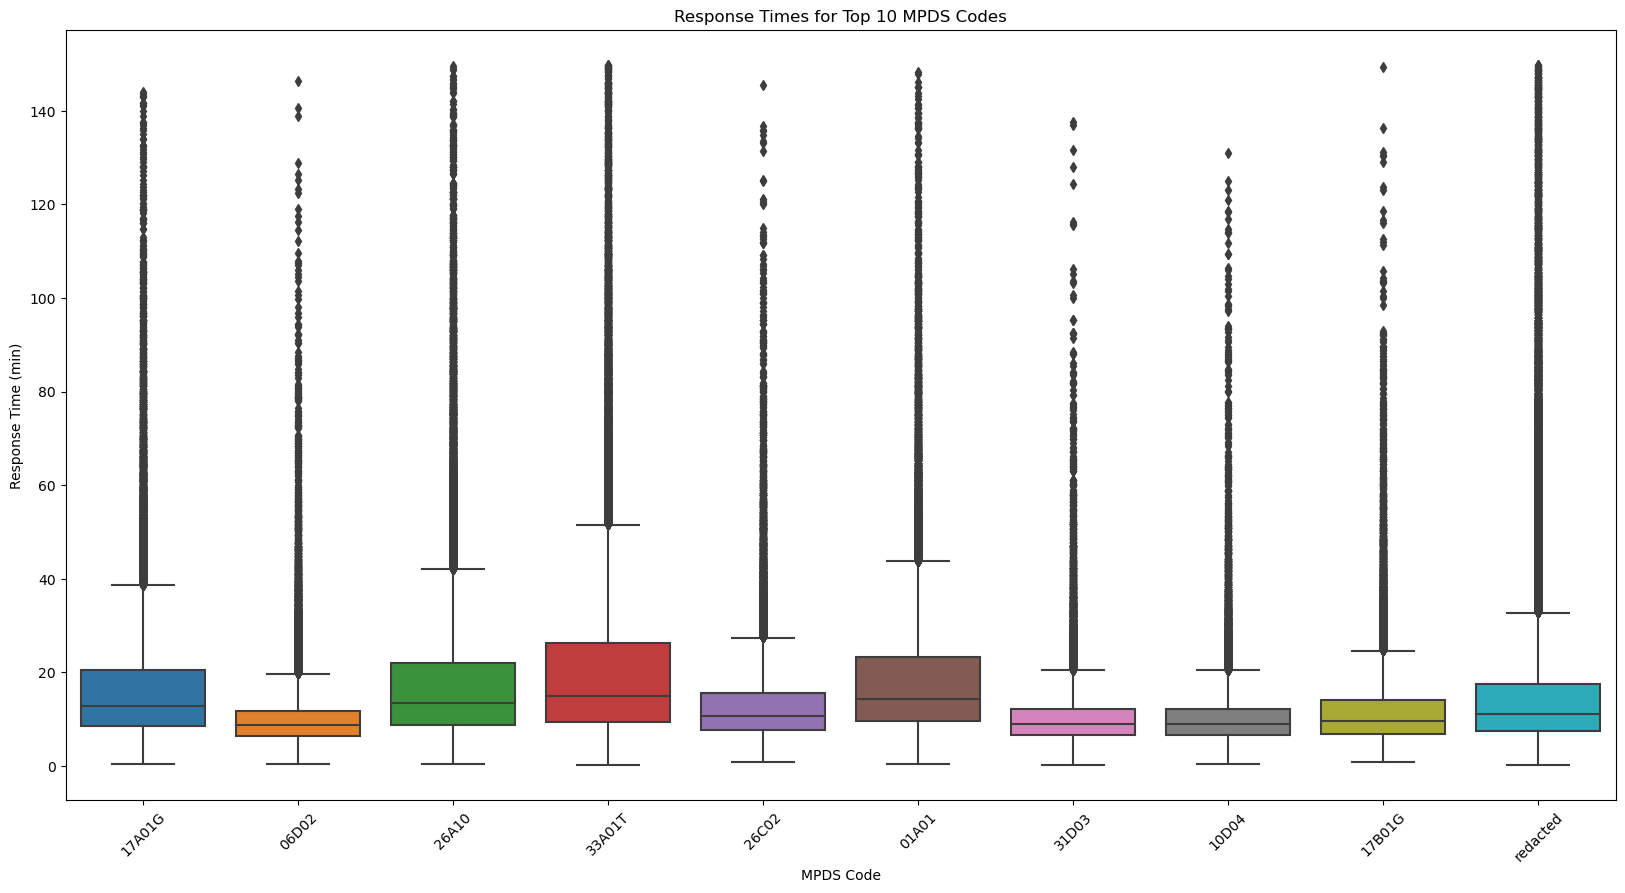

In [181]:
temp_df = ambulance_raw[['MPDS_Code_Initial', 'Resp_Time']].dropna()
top_codes = temp_df['MPDS_Code_Initial'].value_counts().head(10).index
top_df = temp_df[temp_df['MPDS_Code_Initial'].isin(top_codes)]
plt.figure(figsize=(20, 10))
sns.boxplot(x='MPDS_Code_Initial', y='Resp_Time', data=top_df)
plt.title('Response Times for Top 10 MPDS Codes')
plt.xticks(rotation=45)
plt.ylabel('Response Time (min)')
plt.xlabel('MPDS Code')
plt.show()

In [200]:
from scipy.stats import shapiro
response_mode1 = ambulance_raw[ambulance_raw['Response_Mode_Initial'] == 1]['Resp_Time']
response_mode2 = ambulance_raw[ambulance_raw['Response_Mode_Initial'] == 2]['Resp_Time']
response_mode3 = ambulance_raw[ambulance_raw['Response_Mode_Initial'] == 3]['Resp_Time']
normalitytestmode1 = shapiro(response_mode1)
normalitytestmode2 = shapiro(response_mode2)
normalitytestmode3 = shapiro(response_mode3)
normalitytestmode1, normalitytestmode2, normalitytestmode3

ValueError: Data must be at least length 3.

In [197]:
from scipy.stats import mannwhitneyu
mann_whitney_test_result = mannwhitneyu(response_mode2, response_mode3, alternative='two-sided')
mann_whitney_test_result


ValueError: `x` and `y` must be of nonzero size.